# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- XRP, Cardano, AAVE Price Analysis: 14 June.  The last 12 hours have been favorable for all coins in the market. Even the total market capitalization was up by 8% at press time. Cardano was also boosted by the news of smart contracts now running on Alonzo. While Ripple continues its fight against the SEC, XRP posted gains. AAVE did not have much [&#8230;] ... [| Skaityti daugiau](https://ambcrypto.com/xrp-cardano-aave-price-analysis-14-june/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Regina man awakens from 5-week COVID-related coma in time for son's birth | CBC News.  Doctors didn't think Hien Thach had a good chance of survival following a COVID-19 diagnosis. After five weeks in a coma, he awakened to his wife's prayer: that he would one day meet his unborn son. ... [| Skaityti daugiau](http://www.cbc.ca/news/canada/saskatchewan/regina-man-wakes-from-coma-birth-of-son-1.6063051) 

### Kainų kaita pandemijos metu

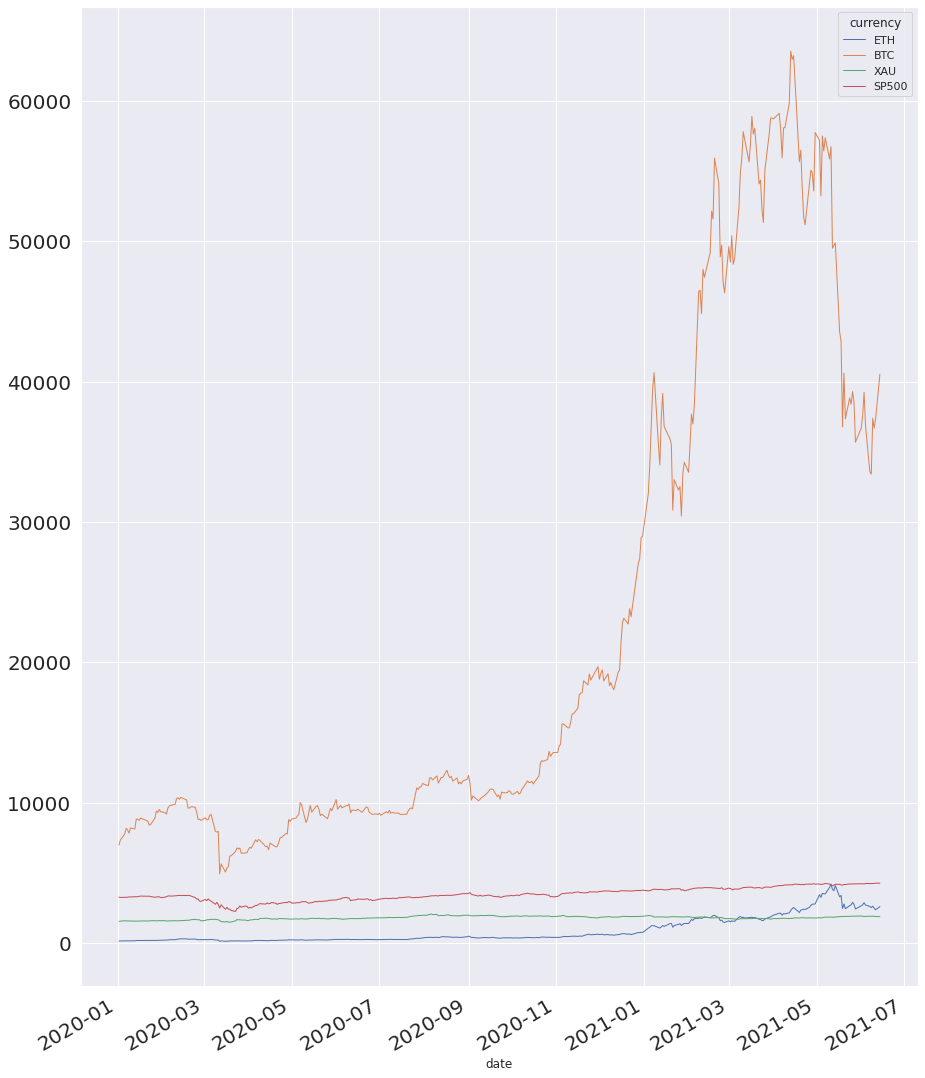

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.896141,0.210291,0.839259
BTC,0.896141,1.000000,0.138715,0.844891
XAU,0.210291,0.138715,1.000000,0.416764
SP500,0.839259,0.844891,0.416764,1.000000


In [8]:
#hide ### Koreliacijos matrica.

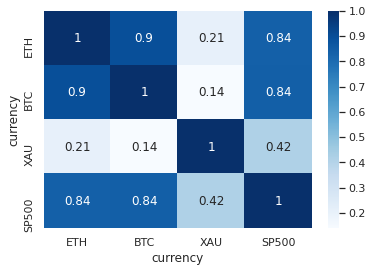

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')